In [1]:
import tensorflow as tf
from model import Model
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
path_to_image_files = ['data/images/18.jpg', 'data/images/31.jpg', 'data/images/62.jpg',
                       'data/images/522.jpg', 'data/images/9527.jpg', 'data/images/8888.jpg']
images = []
for path_to_image_file in path_to_image_files:
    image = tf.image.decode_jpeg(tf.read_file(path_to_image_file), channels=3)
    image = tf.reshape(image, [64, 64, 3])
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = tf.multiply(tf.subtract(image, 0.5), 2)
    image = tf.image.resize_images(image, [54, 54])
    images.append(image)
images = tf.stack(images)

In [3]:
length_logits, digits_logits = Model.inference(images, drop_rate=0.0)
length_predictions = tf.argmax(length_logits, axis=1)
digits_predictions = tf.argmax(digits_logits, axis=2)
digits_predictions_string = tf.reduce_join(tf.as_string(digits_predictions), axis=1)

In [4]:
sess = tf.InteractiveSession()

In [5]:
restorer = tf.train.Saver()
checkpoint_path = tf.train.latest_checkpoint('logs/train')
restorer.restore(sess, checkpoint_path)

In [6]:
length_predictions_val, digits_predictions_string_val, images_val = sess.run([length_predictions, digits_predictions_string, images])
images_val = (images_val / 2.0) + 0.5

length: 4
digits: 888810


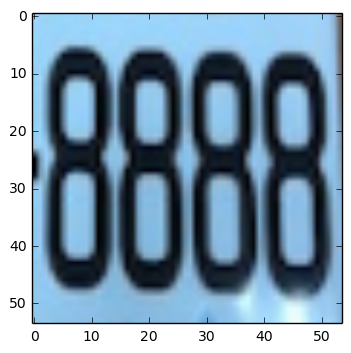

In [9]:
idx = 5
image_val = images_val[idx]
length_prediction_val = length_predictions_val[idx]
digits_prediction_string_val = digits_predictions_string_val[idx]
imshow(images_val[idx])
print 'length: %d' % length_prediction_val
print 'digits: %s' % digits_prediction_string_val

In [10]:
sess.close()